In [1]:
import pandas as pd
import joblib
import numpy as np
import torch
import torch.optim as optim
import warnings 
warnings.simplefilter('ignore')
from torch.nn import Linear,ReLU,Sigmoid
from utils import *
torch.cuda.is_available()

True

In [2]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')

tag['TAG'] = [str(i).replace('TI','TJ') for i in tag['TAG'].values]

temp = tag[tag['TAG']=='MLPAP_TJC-0757A.PV'].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

tag_map = dict(zip(tag['TAG'],tag['chinese']))
tag_map

{'MLPAP_TJC-0627.PV': 'OX預熱器出口溫度',
 'MLPAP_TRC-0610.PV': '空氣預熱器出口溫度',
 'MLPAP_FR-0632.PV': '汽機風量',
 'MLPAP_FQ-0619.PV': 'OX入料量',
 'MLPAP_TJC-0757A.PV': '反應槽鹽浴溫度',
 'MLPAP_PIC-0741.PV': '汽鼓(V211)鍋爐水壓力',
 'MLPAP_LIC-0738.PV': '汽鼓(V211)鍋爐水液位',
 'MLPAP_PIC-0761.PV': '鹽浴冷卻器(E112)出口壓力',
 'MLPAP_TRC-0762.PV': '鹽浴冷卻器(E112)入口溫度',
 'MLPAP_LRC-0729.PV': '鍋爐水液位控制',
 'MLPAP_TJC-1721.PV': '轉換式冷凝器冷油溫度',
 'MLPAP_TRC-1734.PV': '轉換式冷凝器熱油溫度',
 'MLPAP_TJR-0721.PV': '反應槽出口溫度',
 'MLPAP_TJ-0706A01': '反應槽觸媒溫度(CL1)_高度(1900)',
 'MLPAP_TJ-0706A02': '反應槽觸媒溫度_高度(1010)',
 'MLPAP_TJ-0706B01': '反應槽觸媒溫度_高度(2865)',
 'MLPAP_TJ-0706C01': '反應槽觸媒溫度_高度(400)',
 'MLPAP_TJ-0706D01': '反應槽觸媒溫度_高度(2230)',
 'MLPAP_TJ-0706E01': '反應槽觸媒溫度(CL1)_高度(1310)',
 'MLPAP_TJ-0716A01': '反應槽觸媒溫度(CL1)_高度(1160)',
 'MLPAP_TJ-0716B01': '反應槽觸媒溫度_高度(700)',
 'MLPAP_TJ-0716C01': '反應槽觸媒溫度_高度(2715)',
 'MLPAP_TJ-0716D01': '反應槽觸媒溫度_高度(1650)',
 'MLPAP_TJ-0716D02': '反應槽觸媒溫度(CL2)_高度(2380)',
 'MLPAP_TJ-0716E01': '反應槽觸媒溫度(CL0)_高度(550)',
 'MLPAP_FQI-0997.PV': '粗P

In [3]:
critic = joblib.load('./model/net.pkl')
critic = critic.eval()
mm_x = joblib.load('./model/mm_x.pkl')
mm_y = joblib.load('./model/mm_y.pkl')

# def columns

In [4]:
x_cols = [
          'MLPAP_FR-0632.PV',
          'MLPAP_LIC-0738.PV',
          'MLPAP_LRC-0729.PV',
          'MLPAP_PIC-0761.PV',
          'MLPAP_TJ-0757B.PV',
          'MLPAP_TJC-0627.PV',
          'MLPAP_TJC-0757.PV',
          'MLPAP_TJC-0757A.PV',
          'MLPAP_TJC-1721.PV',
          'MLPAP_TRC-0610.PV',
          'MLPAP_TRC-0747.PV',
          'MLPAP_TRC-0762.PV',
          'MLPAP_TRC-1734.PV']
x_cols = sorted(x_cols)
x_cols.insert(0,'MLPAP_FQ-0619.PV')
x_cols

['MLPAP_FQ-0619.PV',
 'MLPAP_FR-0632.PV',
 'MLPAP_LIC-0738.PV',
 'MLPAP_LRC-0729.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TJ-0757B.PV',
 'MLPAP_TJC-0627.PV',
 'MLPAP_TJC-0757.PV',
 'MLPAP_TJC-0757A.PV',
 'MLPAP_TJC-1721.PV',
 'MLPAP_TRC-0610.PV',
 'MLPAP_TRC-0747.PV',
 'MLPAP_TRC-0762.PV',
 'MLPAP_TRC-1734.PV']

In [5]:
y_cols = ['MLPAP_FQI-0997.PV']

# critic forward test

In [6]:
x = np.random.normal(loc=0,scale=1,size=(39,14))
x = pd.DataFrame(x,columns=x_cols)
x.head()

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,-0.434515,0.115485,-0.262700,-0.798393,0.480356,0.331381,0.614158,2.696106,0.505569,0.607654,-0.344397,0.246214,-1.057991,1.193157
1,0.105704,-0.631968,0.363988,-0.564549,-0.129301,1.036355,-0.129008,-1.464622,0.527243,0.736557,0.108784,-0.650221,-0.960410,-1.186611
2,-0.538425,-2.552802,0.448930,1.005069,-2.475027,-0.665419,0.505927,0.737129,-0.592626,0.978055,-2.082104,-0.852464,0.910235,-0.665172
3,1.046958,-1.678023,-0.612350,-0.318565,0.674934,0.583970,-1.687215,-1.659123,-0.873017,-0.427654,0.129939,0.489387,1.195033,1.332669
4,-0.658382,0.854078,0.543684,0.868958,-0.683077,1.074559,0.143392,-0.157606,-0.872247,0.144621,1.204507,0.241234,-0.298308,1.543657


In [7]:
y = critic(torch.tensor(x.values.reshape(-1,39*14)).cuda())
print(y)
y = mm_y.inverse_transform(y.detach().cpu().numpy())
y

tensor([[0.1974]], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward>)


array([[5992.4408548]])

# build generator

In [8]:
def build_generator(input_shape,output_shape):
    net = torch.nn.Sequential(
        Linear(input_shape,256),
        ReLU(),
        Linear(256,output_shape),
        Sigmoid()
    )
    return net

In [9]:
def init_weights(m):
  if hasattr(m,'weight'):
    torch.nn.init.xavier_uniform(m.weight)
  if hasattr(m,'bias'):  
    m.bias.data.fill_(0)

In [10]:
net = build_generator(1,39*14).double().cuda()
net.apply(init_weights)
net

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=546, bias=True)
  (3): Sigmoid()
)

# noise_iter

In [11]:
noise = torch.tensor(np.random.normal(loc=0,scale=1,size=(5000,1))).cuda()
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

# obj function

In [12]:
obj_function = lambda x:critic(x).mean()

# optimizer

In [13]:
optimizer = optim.Adam(net.parameters(),lr=1e-4)

# train

In [14]:
def train(net,noise_iter,obj_function,optimizer,num_epochs=100):
    train_history = []
    for epoch in range(num_epochs):
        train_avg_loss = 0
        t = 0
        for noise in noise_iter:
            noise = noise[0]
            z = net(noise).cuda()
            loss = obj_function(z)
            loss *= -1
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_avg_loss += loss.item()
            t += 1
        train_avg_loss /= t
        print("epochs {} loss {:.4f}".format(epoch,train_avg_loss))
        train_history.append(train_avg_loss)
    # plt train loss
    plt.plot(np.array(train_history))
    plt.title('train loss')
    # return trained net
    return net

epochs 0 loss -0.4449
epochs 1 loss -0.5023
epochs 2 loss -0.5687
epochs 3 loss -0.6376
epochs 4 loss -0.7045
epochs 5 loss -0.7649
epochs 6 loss -0.8159
epochs 7 loss -0.8561
epochs 8 loss -0.8862
epochs 9 loss -0.9088
epochs 10 loss -0.9257
epochs 11 loss -0.9385
epochs 12 loss -0.9483
epochs 13 loss -0.9559
epochs 14 loss -0.9617
epochs 15 loss -0.9665
epochs 16 loss -0.9704
epochs 17 loss -0.9735
epochs 18 loss -0.9761
epochs 19 loss -0.9783
epochs 20 loss -0.9802
epochs 21 loss -0.9818
epochs 22 loss -0.9832
epochs 23 loss -0.9844
epochs 24 loss -0.9855
epochs 25 loss -0.9864
epochs 26 loss -0.9873
epochs 27 loss -0.9880
epochs 28 loss -0.9887
epochs 29 loss -0.9893
epochs 30 loss -0.9899
epochs 31 loss -0.9904
epochs 32 loss -0.9909
epochs 33 loss -0.9913
epochs 34 loss -0.9917
epochs 35 loss -0.9921
epochs 36 loss -0.9925
epochs 37 loss -0.9928
epochs 38 loss -0.9931
epochs 39 loss -0.9934
epochs 40 loss -0.9936
epochs 41 loss -0.9939
epochs 42 loss -0.9941
epochs 43 loss -0.994

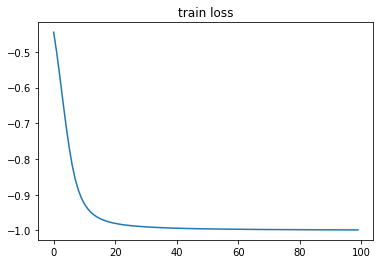

In [15]:
net = train(net,noise_iter,obj_function,optimizer,num_epochs=100)

# result

In [16]:
output = critic(net(noise)).detach().cpu().numpy()
output = mm_y.inverse_transform(output)
output = pd.DataFrame(output,columns=['0997'])
output

,0997
0,9993.295982
1,9989.673034
2,9994.623296
3,9991.774126
4,9989.807840
...,...
4995,9989.617303
4996,9991.135657
4997,9992.156361
4998,9992.514827


In [17]:
best_idx = np.argmax(output.values)
output.loc[[best_idx]]

,0997
1843,9995.304151


In [18]:
result = pd.DataFrame(net(noise).detach().cpu().numpy())
result[:] = mm_x.inverse_transform(result)
r1 = result.iloc[best_idx,:].values.reshape(39,14)
r1 = pd.DataFrame(r1,columns=x_cols)
r1.loc['median'] = r1.median(axis=0)
r1

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,7900.313753,86.553670,22.543147,30.501606,48.932507,345.281105,156.208634,2.965603,345.886225,55.095413,190.764703,180.826702,349.306205,196.988407
1,7931.181147,64.678984,45.718380,58.614093,49.730010,345.672780,156.245816,2.952741,347.135248,55.049761,190.729701,175.331388,364.356401,161.718479
2,4365.249878,86.494044,34.253909,30.622766,48.930134,345.707752,155.922680,-2.432929,348.137182,55.722402,186.720550,168.287430,364.964715,198.741029
3,7802.073786,86.826671,45.865538,30.448387,48.931655,362.286207,156.064334,2.960426,354.648636,55.063805,190.831056,180.558876,364.351992,160.187820
4,7945.856487,86.502946,34.247578,30.423778,48.931382,345.697062,142.484796,-1.878693,361.060506,55.056268,190.707426,168.278766,349.285391,199.888012
5,4400.356011,86.534396,34.269215,53.563058,48.987967,362.271802,156.330052,2.990599,345.944688,55.050444,190.789007,170.067905,349.290316,199.850132
6,7945.729738,86.786971,45.843114,50.900806,49.631661,362.078927,149.547360,1.185159,345.841899,66.437690,190.775293,179.511682,349.208230,160.292515
7,4417.935756,86.605393,45.847738,56.880566,48.935122,346.477089,156.326746,-2.016739,360.656276,55.077260,187.102158,168.116919,364.512813,199.803072
8,7838.453921,86.397272,35.634261,30.983666,48.934356,361.520908,142.438815,2.963582,346.229578,66.431550,190.824444,168.124343,364.916069,166.281881
9,4434.436386,86.669191,34.250402,34.535633,48.940059,362.280870,142.445531,-1.927225,345.888671,55.236585,163.055704,176.114010,349.348161,199.940391


In [19]:
r1 = r1.loc[['median']].T
r1['chinese'] = r1.index.map(tag_map)
r1 = r1[['chinese','median']]

In [20]:
print('best control factor maybe:')
r1

best control factor maybe:


,chinese,median
MLPAP_FQ-0619.PV,OX入料量,7900.313753
MLPAP_FR-0632.PV,汽機風量,86.502946
MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,35.357514
MLPAP_LRC-0729.PV,鍋爐水液位控制,56.105687
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,48.987967
MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,349.231082
MLPAP_TJC-0627.PV,OX預熱器出口溫度,143.086619
MLPAP_TJC-0757.PV,反應器A/B側鹽浴溫度差,2.695011
MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,347.810761
MLPAP_TJC-1721.PV,轉換式冷凝器冷油溫度,65.197042
